# Second First Assignment - Netflix Stock

## Data Manipulation

In this third assignment we are going to make the CAPM Model and apply the Markowitz Theory in the Amazon, Disney, Intel, Netflix and Tesla return series, from 12/31/2014 to 12/31/2020. We are using python3.x in a Jupyter Notebook, in the end the *.py* code will be provided. The data was collected from Yahoo Finance, in this [link](https://finance.yahoo.com/).


Like any program in python we start by installing and importing the necessary packages.

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import csv
import datetime as datetime
import matplotlib.dates as mdates
import seaborn; seaborn.set()
import statsmodels as sm

%matplotlib inline 

Then, reading the our datafiles

In [146]:
amzn = pd.read_csv('AMZN.csv')
dis  = pd.read_csv('DIS.csv')
intc = pd.read_csv('INTC.csv')
nflx = pd.read_csv('NFLX.csv')
nsdq = pd.read_csv('NSDQ.csv')
tsla = pd.read_csv('TSLA.csv')

The date column is stored as an object, which is not the type we need it. We will use this function and pandas will take care of it.




In [147]:
amzn['Date'] = pd.to_datetime(amzn['Date'])
dis['Date']  = pd.to_datetime(dis['Date'])
intc['Date'] = pd.to_datetime(intc['Date'])
nflx['Date'] = pd.to_datetime(nflx['Date'])
nsdq['Date'] = pd.to_datetime(nsdq['Date'])
tsla['Date'] = pd.to_datetime(tsla['Date'])

## Returns

### Theory

The linear return represents how much the price variates from time to time. Using the equation

\begin{align}
  R_{t} = \frac{x_{i+\Delta t}}{x_i} - 1
\end{align}

denoting $x_{i}$ as the price of the day and $\Delta t$ as time variation. Here $\Delta t$ equals one day and then we will have the linear return ($R_t$) for every day of our series, except from the last day, as we necessarialy will need the price of next day.Defining

\begin{align}
  r_{t} = \log{(1 + R_t)}
\end{align}

and inputing the equation of linear return we obtain the log return

\begin{align}
  r_{t} = \log{\left(\frac{x_{i+\Delta t}}{x_{i}}\right)} =\log{(x_{i+\Delta t})} - \log{(x_i)} \approx R_t
\end{align}

It is an approximation of the linear return, but have some better statistics proprieties [[$^1$](http://www.portalaction.com.br/series-temporais/51-retornos)]. Again, we use $\Delta t$ as one day and this gives us the log return ($r_{t}$) for every day of our series.

The normalized return is modeled by

\begin{align}
  r_{a} = \frac{(r_t - \mu)}{\sigma}
\end{align}

where $\mu$ is the mean of our series and $\sigma$ is de standard deviation. The reason to do this return is to compare with others, but this is not the scope of this work. 

### Results

Defining a function that evaluates our normalized returns

In [148]:
def normalized_return(datafile):
    close_values = datafile['Close'].values
    data_e_values  = datafile['Date'].values
    N = len(close_values)

    data_values = []
    log_return = []
    n_return = []

    ##log return
    for i in range(N-1):
        log_return.append(np.log(close_values[i+1]) - np.log(close_values[i]))
        data_values.append(data_e_values[i])

    ##normalized return
    mean = np.average(log_return)
    stdev = np.std(log_return)

    for i in range(N-1):
        n_return.append((log_return[i]-mean)/stdev)    

    ##return
    return np.array(data_values), np.array(n_return)

Calculating our returns

In [149]:
amzn_d, amzn_r = normalized_return(amzn)
dis_d,  dis_r  = normalized_return(dis)
intc_d, intc_r = normalized_return(intc)
nflx_d, nflx_r = normalized_return(nflx)
nsdq_d, nsdq_r = normalized_return(nsdq)
tsla_d, tsla_r = normalized_return(tsla)

Plotting

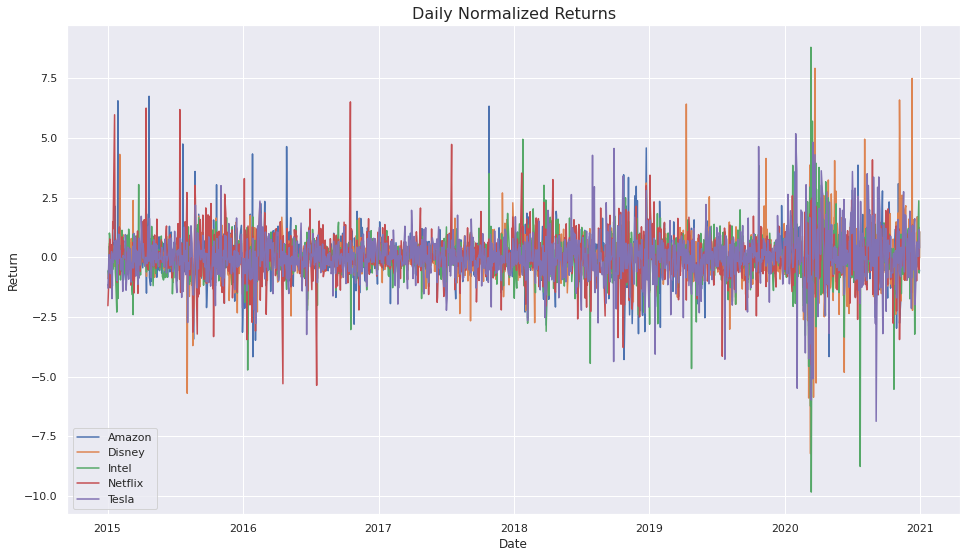

In [150]:
fig, ax = plt.subplots(figsize=(16, 9))

plt.plot(amzn_d, amzn_r, label='Amazon')
plt.plot(dis_d, dis_r, label='Disney')
plt.plot(intc_d, intc_r, label='Intel')
plt.plot(nflx_d, nflx_r, label='Netflix')
plt.plot(tsla_d, tsla_r, label='Tesla')

plt.legend(loc='upper right')
plt.title('Daily Normalized Returns', fontsize=16)
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Return')

plt.show()

## CAPM

### Theory

The Capital Asset Pricing Model (CAPM) is a method to find the correlation between risk and expected returns in an investment.

It follows the equation

\begin{aligned}
    R = r_0 + \beta(R_m + r_0)
\end{aligned}

Where $R$ is the expected return, $r_0$ is the interest rate, $R_m$ is the market's expected return and $\beta$ is the systemic risk. $\beta$ is given by

\begin{aligned}
    \beta = \frac{\text{Cov}(R,R_m)}{\text{Var}(R_m)}
\end{aligned}

Where $\text{Cov}(R,R_m)$ is the covariance and $\text{Var}(R_m)$ is the variance.

With our CAPM's equation we can make the Security Market Line (SML). We can find it our stock is returning more or less than the wallet of this market


Calculating our $\beta$ and settinf our interest rate $r_0 = 0$

### Results

Calculating $\beta$ for every stock

In [175]:
def beta(df1, df2):
    return [[np.cov(df1, df2)[0][1]/np.var(df2)],
            [np.mean(df1)]]

amzn_c = beta(amzn_r, nsdq_r)
dis_c  = beta(dis_r, nsdq_r)
intc_c = beta(intc_r, nsdq_r)
nflx_c = beta(nflx_r, nsdq_r)
tsla_c = beta(tsla_r, nsdq_r)

r_0 = 0.0
rm_nflx = np.mean(nsdq_r)

Plotting our results

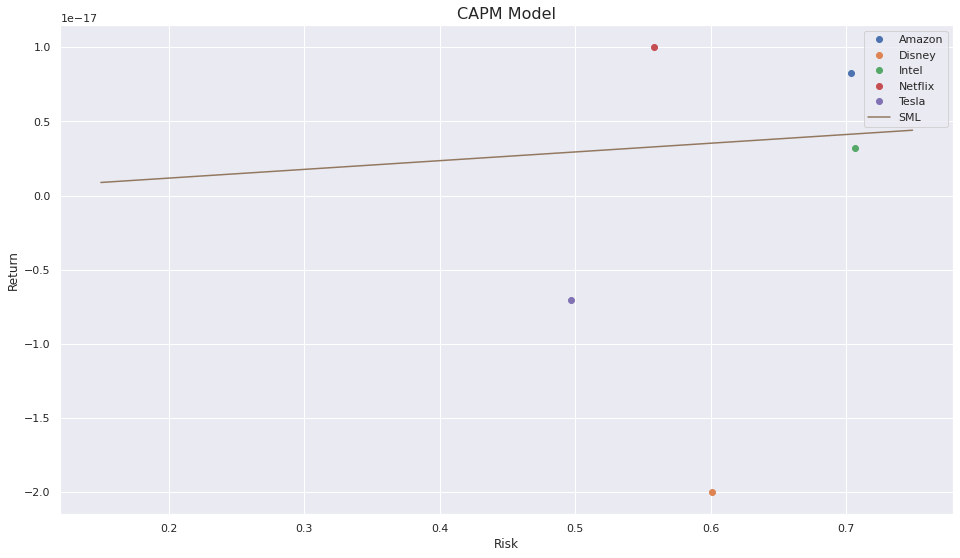

In [176]:
fig, ax = plt.subplots(figsize=(16, 9))

plt.plot(amzn_c[0], amzn_c[1], 'o', label='Amazon')
plt.plot(dis_c[0],  dis_c[1],  'o', label='Disney')
plt.plot(intc_c[0], intc_c[1], 'o', label='Intel')
plt.plot(nflx_c[0], nflx_c[1], 'o', label='Netflix')
plt.plot(tsla_c[0], tsla_c[1], 'o', label='Tesla')
plt.plot(np.arange(0.15,0.75,0.001),
         [r_0 + i*(rm_nflx-r_0) for i in np.arange(0.15,0.75,0.001)],
         label="SML")

plt.title('CAPM Model', fontsize=16)
plt.legend(loc='best')
plt.xlabel('Risk')
plt.ylabel('Return')

plt.show()

We obtain that we will make our wallet using Amazon and Netflix

## Markowitz

### Theory

According to Markowitz theory we want to maximize our returns and minimize the risk. Defining a vector of the returns in function of time

\begin{aligned}
    \vec{r}(t) = \left[ \begin{array}{c}
                    R_1(t) \\ R_2(2) \\ \vdots \\ R_n(t)
                 \end{array} \right]
\end{aligned}

Where $R_n(t)$ is the return of $n$-th stock. We can also define a vector for the expected returns

\begin{aligned}
    \vec{\alpha}(t) = \left[ \begin{array}{c}
                    \alpha_1(t) \\ \alpha_2(2) \\ \vdots \\ \alpha_n(t)
                 \end{array} \right]
\end{aligned}

Where $\alpha_n(t)$ is the expected return of $n$-th stock. The covariance matrix is given by

\begin{aligned}
    S = \langle(\vec{r}-\vec{\alpha})(\vec{r}-\vec{\alpha})^T\rangle
\end{aligned}

And our expected income is

\begin{aligned}
    \alpha_w = \vec{w} \cdot \vec{\alpha}
\end{aligned}

where $\vec{w}$ is a column vector that representes each weight of our stock.

Markowitz theory says that we want to minimize the risk using Lagrange multipliers. I'll not enter in the formalism, in the end we will find a matrix $M$, given by

\begin{aligned}
    M = \left[
        \begin{array}{cc}
            \vec{e} \cdot S^{-1} \cdot \vec{e} & \vec{\alpha} \cdot S^{-1} \cdot \vec{e}  \\
            \vec{\alpha} \cdot S^{-1} \cdot \vec{e} & \vec{\alpha} \cdot S^{-1} \cdot \vec{\alpha}
        \end{array}
        \right]
\end{aligned}

Then, the so called Markowitz Bullet can be expressed mathematically by

\begin{aligned}
    \sigma^2_w = \left[\begin{array}{cc}1 & \alpha_0\end{array} \right]
     M^{-1}
      \left[ \begin{array}{c}1 \\ \alpha_0\end{array} \right]
\end{aligned}


### Results

Calculating our matrices

In [165]:
alpha = np.array([[amzn_r.mean()], [nflx_r.mean()]])
r = np.array([[amzn_r], [nflx_r]])

S = np.cov([amzn_r, nflx_r])
S_i = np.linalg.inv(S)

e  = np.array([[1], [1]])
e_t = np.transpose(e)

M = np.array([[e.T.dot(S_i.dot(e))[0][0], alpha.T.dot(S_i.dot(e))[0][0]],
            [e.T.dot(S_i.dot(alpha))[0][0], alpha.T.dot(S_i.dot(alpha))[0][0]]])
M_i = np.linalg.inv(M)

Our best portfolio

In [167]:
r_e = [] 
risk=[]
portfolio=[0,0,0]

for i in np.arange(-0.0001,0.001,0.0000001):
    r_e.append(i)
    risk_i=np.sqrt(np.array([1, i]).dot(M_i.dot(np.array([[1], [i]])))[0])
    risk.append(risk_i)
    ratio = i/risk_i

    if ratio > portfolio[0]:
        portfolio[0] = ratio
        portfolio[1] = i 
        portfolio[2] = risk_i

In [190]:
alpha_zero_mu = M_i.dot(np.array([[1],[portfolio[1]]]))
w_0 = alpha_zero_mu[0]*(S_i.dot(e) + alpha_zero_mu[1]*(S_i.dot(alpha)))

sum = 0
aux = []

for i in w_0:
    sum += i

for i in w_0:
    aux.append(max(0, i/sum))

w_0 = aux

Plotting

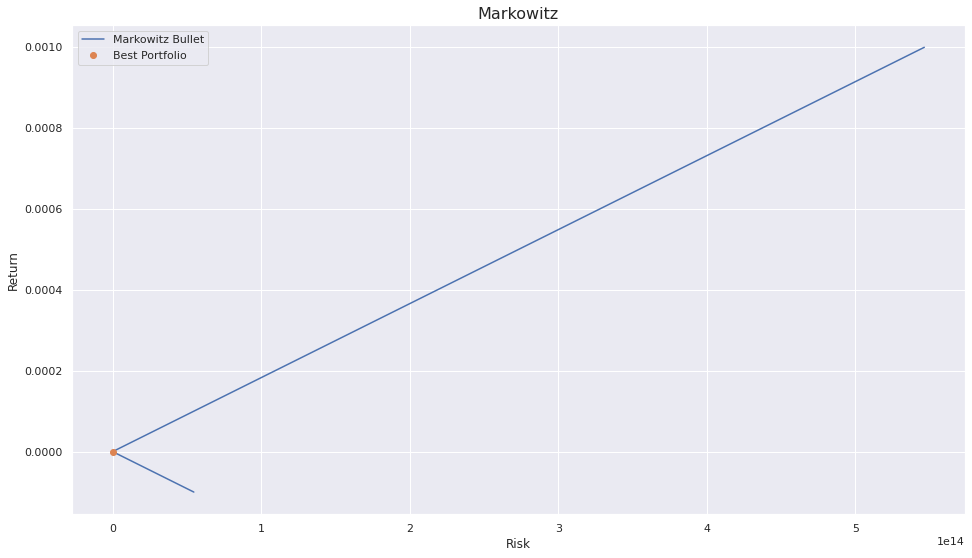

In [192]:
fig, ax = plt.subplots(figsize=(16, 9))

#plt.plot(np.std(amzn['Close']), np.mean(amzn['Close']), 'o', label='Amazon')
#plt.plot(np.std(nflx['Close']), np.mean(nflx['Close']), 'o', label='Netflix')

plt.plot(risk, r_e, label='Markowitz Bullet')
plt.plot(portfolio[2], portfolio[1], 'o', label='Best Portfolio')

plt.legend(loc='upper right')
plt.title('Markowitz', fontsize=16)
plt.legend(loc='best')
plt.xlabel('Risk')
plt.ylabel('Return')

plt.show()

As we can see there is some error. Our Markowitz Bullet is not a quadratic function. This error could be associated by the lack of data. After make our CAPM model we used only two stocks. Another error could be found in the programming.

This project would be done if weren't for my coleagues. If you want to download the *.py* or the *.ipynb* there is some link below.

[Python Code](http://lief.if.ufrgs.br/~pedhmendes/cadeiras/econofisica/third_assignment.py)

[Jupyter Notebook Code](http://lief.if.ufrgs.br/~pedhmendes/cadeiras/econofisica/third_assignment.ipynb)